#  <span style="color:orange">Regression Tutorial (REG101) - Level Beginner</span>

**Created using: PyCaret 2.2** <br />
**Date Updated: November 25, 2020**

# 1.0 チュートリアルの目的
Regression Tutorial (REG101) - Level Beginner へようこそ。このチュートリアルでは、あなたがPyCaretを初めて使い、`pycaret.regression`モジュールを使って回帰を始めようとしていることを想定しています。

このチュートリアルでは、以下のことを学びます。


* **Getting Data:** PyCaret リポジトリからデータをインポートする方法。
* **Setting up Environment:** PyCaretで実験を行い、回帰モデルの構築を開始する方法
* **Create Model:** モデルを作成し、クロスバリデーションを行い、回帰メトリクスを評価する方法
* **Tune Model:** 回帰モデルのハイパーパラメータを自動的にチューニングする方法
* **Plot Model:** 様々なプロットを使用してモデルのパフォーマンスを分析する方法
* **Finalize Model:** 実験の最後に最適なモデルを最終決定する方法
* **Predict Model:** 新しい/未見のデータに対して予測を行う方法
* **Save / Load Model:** 今後の使用のためにモデルを保存/ロードする方法

読了時間：約30分


# 1.1 PyCaretのインストール
PyCaretを使い始めるための最初のステップは、PyCaretをインストールすることです。インストールは簡単で、数分で完了します。以下の説明に従ってください。

# ローカルJupyterノートブックへのPyCaretのインストール
`pip install pycaret` <br />。

# Google Colab や Azure Notebooks への PyCaret のインストール
`!pip install pycaret`


# 1.2 前提条件
- Python 3.6以上
- PyCaret 2.0 以上
- pycaretのリポジトリからデータを読み込むためのインターネット接続環境
- 回帰の基礎知識

# 1.3 Google Colabをお使いの方へ。
このノートブックをGoogle colabで動作させている場合、インタラクティブなビジュアルを表示するために、ノートブックの先頭で以下のコードを実行してください。
 
`from pycaret.utils import enable_colab` 
`enable_colab()`

# 1.4 See also:
- __[回帰チュートリアル (REG102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)__
- __[回帰チュートリアル (REG103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Expert%20-%20REG103.ipynb)__

# 2.0 回帰分析とは？

回帰分析とは、従属変数（しばしば「結果変数」または「ターゲット」と呼ばれる）と1つまたは複数の独立変数（しばしば「特徴」、「予測因子」または「共変量」と呼ばれる）との間の関係を推定するための一連の統計処理です。機械学習における回帰の目的は、売上金額、数量、温度などの連続値を予測することです。

_[回帰についてもっと知りたい](https://hbr.org/2015/11/a-refresher-on-regression-analysis)__。

# 3.0 PyCaretの回帰モジュールの概要
PyCaretの回帰モジュール(`pycaret.regression`)は、様々な技術やアルゴリズムを用いて、連続的な値や結果を予測するために使用される教師付き機械学習モジュールです。回帰は、売上、販売数、温度などの値や結果、または連続的な任意の数値を予測するために使用できます。

PyCaretの回帰モジュールは、25以上のアルゴリズムと、モデルの性能を分析するための10のプロットを備えています。ハイパーパラメータチューニング、アンサンブル、スタックのような高度なテクニックなど、PyCaretの回帰モジュールはすべてを備えています。

# 4.0 Dataset for the Tutorial

このチュートリアルでは、**"Sarah Gets a Diamond "**というケーススタディに基づいたデータセットを使います。このケースは、Darden School of Business (University of Virginia)の1年生の意思決定分析のコースで紹介されました。データのベースとなっているのは、絶望的なロマンチストのMBA学生が、花嫁となるサラにふさわしいダイヤモンドを選ぶというケースです。データにはトレーニング用の6000レコードが含まれています。各カラムの簡単な説明は以下の通りです。

- ID:** 各観測データ（ダイヤモンド）を一意に識別する。
- Carat Weight:** ダイヤモンドの重量をメートル法で表したもの。1カラットは0.2グラムに相当し、ペーパークリップとほぼ同じ重さである。
- Cut：**ダイヤモンドのカットを示す5つの値のうちの1つで、望ましい順に並べたもの（Signature-Ideal、Ideal、Very Good、Good、Fair）。
- Color：**ダイヤモンドのカラーを示す6つの値のうち、望ましい順に1つを選択（D、E、F-無色、G、H、I-無色に近い）。
- Clarity：**ダイヤモンドのクラリティを示す7つの値のうち、望ましい順に1つ（F - Flawless、IF - Internally Flawless、VVS1またはVVS2 - Very, Very Slightly Included、またはVS1またはVS2 - Very Slightly Included、SI1 - Slightly Included）。
- Polish：**ダイヤモンドの研磨状態を示す4つの値のうちの1つ（ID - Ideal、EX - Excellent、VG - Very Good、G - Good）。
- Symmetry：** ダイヤモンドのシンメトリーを示す4つの値のうちの1つ（ID - Ideal, EX - Excellent, VG - Very Good, G - Good）。
- Report:** ダイヤモンドの品質を報告したグレーディング機関を示す2つの値「AGSL」または「GIA」のうちの1つ。
- **Price:** ダイヤモンドの評価額を米ドルで表したもの `Target Column` です。


# Dataset Acknowledgement:
このケースは、Phillip E. Pfeifer (Alumni Research Professor of Business Administration)の監修のもと、Greg Mills (MBA '07)が作成しました。Copyright (c) 2007 by the University of Virginia Darden School Foundation, Charlottesville, VA. すべての権利は留保されています。

オリジナルのデータセットと説明は、__[ここにあります。](https://github.com/DardenDSC/sarah-gets-a-diamond)__。

# 5.0 Getting the Data

オリジナルのソースからデータをダウンロードして、pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__を使ってロードすることもできますし、PyCaretのデータリポジトリを使って、`get_data()`関数を使ってデータをロードすることもできます(この場合はインターネット接続が必要です)。

In [22]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
#check the shape of data
dataset.shape

(6000, 8)

オリジナルのソースからデータをダウンロードして、pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__を使ってロードすることもできますし、PyCaretのデータリポジトリを使って、`get_data()`関数を使ってデータをロードすることもできます(この場合はインターネット接続が必要です)。

In [4]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


# 6.0 Setting up Environment in PyCaret

`setup()`関数はpycaretの環境を初期化し、モデリングやデプロイメントのためにデータを準備する変換パイプラインを作成します。`setup()`はpycaretの他の関数を実行する前に呼ばれなければなりません。`setup()`は2つの必須パラメータを取ります: pandasデータフレームとターゲットカラムの名前です。他のすべてのパラメータはオプションで、前処理パイプラインをカスタマイズするために使用されます（後のチュートリアルで見てみましょう）。

`setup()`が実行されると、PyCaretの推論アルゴリズムは、特定のプロパティに基づいて、すべての特徴のデータ型を自動的に推論します。データ型は正しく推論されるべきですが、必ずしもそうではありません。これを考慮して、PyCaretは`setup()`が実行された後に、フィーチャーとその推論されたデータタイプを含むテーブルを表示します。すべてのデータタイプが正しく認識された場合、`enter`を押して続行するか、`quit`をタイプして実験を終了することができます。PyCaretでは、機械学習の実験に不可欠ないくつかの前処理を自動的に行うため、データ型が正しいことを確認することは非常に重要です。これらのタスクはデータタイプごとに実行される内容が異なるため、正しく設定されていることが非常に重要です。

後のチュートリアルでは、`setup()`の`numeric_features`と`categorical_features`パラメータを使って、PyCaretの推論したデータ型を上書きする方法を学びます。

In [6]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


セットアップが正常に実行されると，いくつかの重要な情報を含む情報グリッドが表示されます。ほとんどの情報は、`setup()`の実行時に構築される前処理パイプラインに関連しています。これらの機能の大部分は、このチュートリアルの目的からは外れています。しかし、この段階で注意すべきいくつかの重要な点があります。

- **session_id :** 後の再現性のために、すべての関数でシードとして配布される疑似乱数です。もし`session_id`が渡されない場合は、自動的に乱数が生成され、すべての関数に配布されます。この実験では、後の再現性のために、`session_id`を`123`としています。
- **Original Data :** データセットの元の形を表示します。 **元のデータ :**元のデータの形を表示します。

- **Missing Values :** 元のデータに欠損値がある場合は、Trueと表示されます。この実験では、データセットに欠損値はありません。 
 
- **Numeric Features :** 数値として推定された特徴の数です。このデータセットでは、8つの特徴のうち1つが数値として推論されています。 
 
- **Categorical Features :** カテゴライズされた特徴の数。このデータセットでは、8つの特徴のうち6つがカテゴライズされています。
 
- **Transformed Train Set :** 変換後のトレーニングセットの形状を表示します。元の形状である(5400, 8)が、変換後の訓練セットでは(3779, 28)に変換されていることに注目してください。カテゴリーエンコーディングにより、特徴量の数が28から8に増えています 。

- **Transformed Test Set :** 変換されたテストセット/ホールドアウトセットの形状を表示します。test/hold-out setには1621個のサンプルがあります。この分割は、デフォルトの70/30に基づいていますが、セットアップの`train_size`パラメータで変更することができます。

欠損値のインプテーション（この場合、トレーニングデータには欠損値はありませんが、見たことのないデータのインプテーションが必要です）やカテゴリーエンコーディングなど、モデリングを行う上で必須となるいくつかのタスクが自動的に処理されていることに注目してください。setup()`のパラメータのほとんどはオプションで，前処理パイプラインをカスタマイズするために使われます。このチュートリアルでは、これらのパラメータは対象外ですが、中級者、上級者になるにつれて、より詳細に説明していきます。



# 7.0 Comparing All Models

すべてのモデルを比較して性能を評価することは、セットアップが完了した後のモデリングの出発点として推奨されています（どのようなモデルが必要かを正確に把握している場合は別ですが、そうでない場合も多いです）。この関数は、モデルライブラリ内のすべてのモデルを学習し、k-foldクロスバリデーションを用いてスコアリングを行い、メトリクス評価を行います。出力は、フォールド（デフォルトでは10）間の平均MAE、MSE、RMSE、R2、RMSLE、MAPEを学習時間とともに示すスコアグリッドを表示します。

In [7]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.6770
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.6030
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.0690
gbr,Gradient Boosting Regressor,920.2913,3764303.9252,1901.1793,0.9633,0.1024,0.0770,0.1790
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0250
ridge,Ridge Regression,2413.5699,14120502.6658,3726.1654,0.8621,0.6689,0.2875,0.0240
lasso,Lasso Regression,2412.1923,14246797.4336,3744.2305,0.8608,0.6767,0.2866,0.0220
llar,Lasso Least Angle Regression,2355.6152,14272020.0301,3745.3094,0.8607,0.6391,0.2728,0.0210
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.0230
lr,Linear Regression,2461.5495,14640851.5481,3784.8908,0.8576,0.6667,0.2937,1.3470


2つのシンプルなコード ***（1行ではありません）*** は、クロスバリデーションを用いて20以上のモデルをトレーニング、評価しました。上に表示されているスコアグリッドは、比較のために最も高いパフォーマンスのメトリックを強調しています。デフォルトでは、「R2」でソートされていますが、「sort」パラメータを渡すことで変更できます。例えば，`compare_models(sort = 'RMSLE')` は，RMSLE でグリッドをソートします（低い方が良いので，低い方から高い方へ）．foldパラメータをデフォルトの`10`から別の値に変更したい場合は，`fold`パラメータを使用します．例えば，`compare_models(fold = 5)` は，すべてのモデルを5回のクロスバリデーションで比較します．フォールドの数を減らすことで、学習時間を短縮することができます。デフォルトでは、compare_models はデフォルトのソート順に基づいて最もパフォーマンスの高いモデルを返しますが、`n_select` パラメータを使用することで、上位 N 個のモデルのリストを返すことができます。

特定のモデル（ここでは `RANSAC` ）をブロックするために `exclude` パラメータが使用されていることに注目してください。

# 8.0 Create a Model

`create_model`は、PyCaretの中で最も粒度の高い関数であり、PyCaretのほとんどの機能の基礎となっています。名前が示すように、この関数は、foldパラメータで設定できるクロスバリデーションを使用して、モデルのトレーニングと評価を行います。出力は、フォールドごとのMAE、MSE、RMSE、R2、RMSLE、MAPEを示すスコアグリッドを表示します。

このチュートリアルの残りの部分では、以下のモデルを候補モデルとして使用します。ここでの選択は説明のためのものであり、必ずしもこれらが最高のパフォーマンスであったり、この種のデータにとって理想的であることを意味するものではありません。

- AdaBoost Regressor ('anda')
- Light Gradient Boosting Machine ('lightgbm') 
- 決定木 ('dt')

PyCaretのモデルライブラリには25個のリグレッサーがあります。全てのレグレッサーのリストを見るには、docstringを確認するか、`models`関数を使ってライブラリを確認してください。

In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# 8.1 AdaBoost Regressor

In [8]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4101.8809,23013830.0177,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,29296751.6657,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,22291660.1785,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,23482783.6839,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,24461807.7242,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,29733914.8752,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,27841092.1974,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,25979752.0083,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,21097072.3513,4593.1549,0.7928,0.4858,0.5513
9,4291.1097,24815566.0009,4981.5225,0.7637,0.5495,0.6592


In [8]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


# 8.2 Light Gradient Boosting Machine 

In [9]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3328375.4390,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3353992.2636,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3127561.3571,1768.4913,0.9702,0.0872,0.0609


# 8.3 Decision Tree

In [10]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2456840.0599,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9852564.2047,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2803662.6885,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3926739.3726,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9751516.1909,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7833770.7037,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3989282.4802,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2182534.9007,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4904945.0821,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5354347.6956,2313.9463,0.9490,0.1230,0.0847


すべてのモデルの平均スコアが，`compare_models()`で出力されたスコアと一致していることに注目してください．これは，`compare_models()`のスコアグリッドに表示されるメトリクスが，すべてのCVフォールドの平均スコアであるためです．compare_models()` と同様に，fold パラメータをデフォルトの 10 から別の値に変更したい場合には，`fold` パラメータを使用します．例：`create_model('dt', fold = 5)` とすると，5フォールドのクロスバリデーションを用いて決定木を作成することができます．

# 9.0 Tune a Model

`create_model`関数を使ってモデルを作成すると，デフォルトのハイパーパラメータを使ってモデルを学習します．ハイパーパラメータを調整するには，`tune_model`関数を使用します．この関数は，あらかじめ定義された探索空間において，`Random Grid Search`を用いてモデルのハイパーパラメータを自動的に調整します．出力では，MAE，MSE，RMSE，R2，RMSLE，MAPEをフォールドごとに示したスコアグリッドを印刷します．カスタム検索グリッドを使用するには，`tune_model`関数で`custom_grid`パラメータを渡します（後述の9.2 LightGBMのチューニングを参照）．

# 9.1 AdaBoost Regressor

In [11]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2629.7158,16222922.0054,4027.7689,0.8219,0.2553,0.2244
1,2764.7250,25273189.9003,5027.2448,0.8063,0.2714,0.2357
2,2605.9909,16883405.3119,4108.9421,0.8451,0.2617,0.2352
3,2588.0395,14475338.1062,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,13602075.2435,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,20724600.2592,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,19796302.1522,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,17084596.1502,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,16340453.5625,4042.3327,0.8395,0.2623,0.2199
9,2545.6132,19267454.7853,4389.4709,0.8165,0.2680,0.2247


In [12]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


# 9.2 Light Gradient Boosting Machine

In [13]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [14]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,649.2541,1131046.4835,1063.5067,0.9876,0.0721,0.0544
1,785.8158,5518411.7880,2349.1300,0.9577,0.0730,0.0522
2,808.0977,3024520.4058,1739.1148,0.9723,0.0836,0.0597
3,749.7881,1774260.2775,1332.0136,0.9804,0.0724,0.0556
4,694.0351,1974576.4174,1405.1962,0.9754,0.0838,0.0585
5,841.6462,6725524.0654,2593.3615,0.9426,0.0824,0.0582
6,796.0240,3324498.6208,1823.3208,0.9688,0.0774,0.0564
7,713.1006,1872493.1136,1368.3907,0.9763,0.0715,0.0551
8,775.9760,2274682.3424,1508.2050,0.9777,0.0766,0.0579
9,768.3451,3247098.5445,1801.9707,0.9691,0.0885,0.0594


In [15]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# 9.3 Decision Tree

In [16]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1000.7122,2895159.1309,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6686388.0416,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3275429.6329,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4037154.5985,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7889520.5391,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,11021312.1970,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4463866.3029,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3271028.5175,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4441966.3616,2107.5973,0.9564,0.1114,0.0873
9,1065.1662,5192339.2748,2278.6705,0.9506,0.1224,0.0873


デフォルトでは，`tune_model` は `R2` を最適化しますが，optimize パラメータを用いてこれを変更することができます．例えば，tune_model(dt, optimize = 'MAE')は，最高の`R2`ではなく，最低の`MAE`となる決定木回帰因子のハイパーパラメータを検索します．この例では、わかりやすくするために、デフォルトの指標である「R2」を使用しています。リグレッサーを評価するために適切なメトリクスを選択する方法は、このチュートリアルの範囲を超えていますが、もっと詳しく知りたい方は、__[click here](https://www.dataquest.io/blog/understanding-regression-error-metrics/)__で回帰誤差メトリクスに関する理解を深めることができます。

生産に最適なモデルを決定する際に考慮すべき基準は、メトリクスだけではありません。考慮すべき他の要素には、トレーニング時間、k-foldの標準偏差などがあります。チュートリアルシリーズを進めていく中で、これらの要素について、中級者レベル、上級者レベルで詳しく説明していきます。ここでは、`tuned_lightgbm`変数に格納されているTuned Light Gradient Boosting Machineを、このチュートリアルの残りの部分での最適なモデルとして考えてみましょう。

# 10.0 Plot a Model

モデルを完成させる前に，`plot_model()`関数を使って，残差プロット，予測誤差，特徴の重要度など，さまざまな側面から性能を分析することができます．この関数は、学習されたモデルオブジェクトを受け取り、テスト/ホールドアウトセットに基づいたプロットを返します。

10種類以上のプロットが用意されていますので、利用可能なプロットのリストは `plot_model()` のドキュメントをご覧ください。

# 10.1 Residual Plot 残差プロット

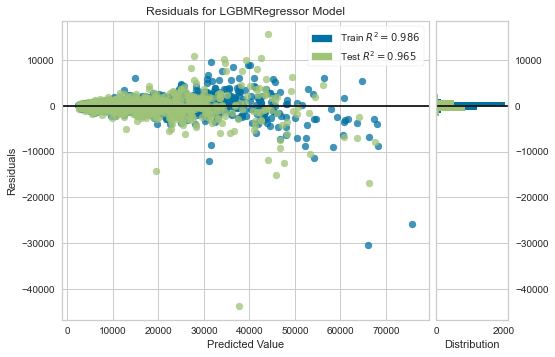

In [17]:
plot_model(tuned_lightgbm)

# 10.2 Prediction Error Plot 予測誤差のプロット

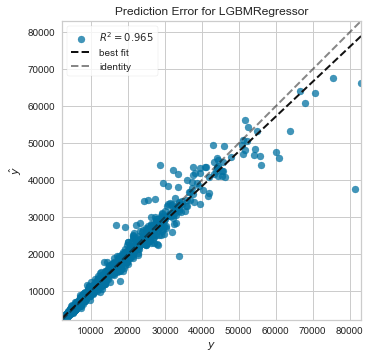

In [18]:
plot_model(tuned_lightgbm, plot = 'error')

# 10.3 Feature Importance Plot フィーチャー・インポータンス・プロット

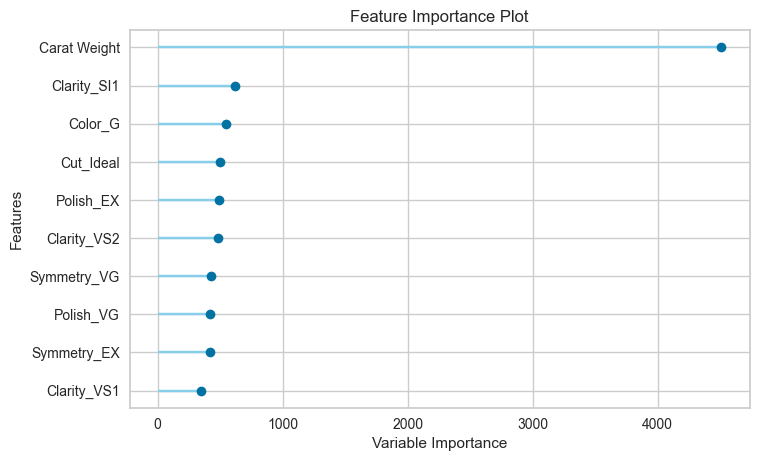

In [19]:
plot_model(tuned_lightgbm, plot='feature')

*モデルの性能* を分析するもう一つの方法は，`evaluate_model()`関数を使うことです．この関数は，与えられたモデルについて利用可能なすべてのプロットのためのユーザインタフェースを表示します．この関数は，内部的には `plot_model()` 関数を使用しています．

In [20]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on Test / Hold-out Sample

モデルを最終的に決定する前に、テスト/ホールドアウトセットを予測し、評価指標を確認することで、最終的なチェックを行うことが推奨されます。前述のセクション6の情報グリッドを見ると、データの30%（1621サンプル）がテスト/ホールドアウトサンプルとして分離されていることがわかります。これまでの評価指標は、すべてトレーニングセット（70％）のみを対象としたクロスバリデーションの結果です。次に、`tuned_lightgbm`変数に格納されている最終的な学習モデルを用いて、ホールドアウトサンプルを予測し、評価指標がCVの結果と大きく異なっていないかどうかを評価します。

In [21]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,781.5572,3816757.2761,1953.6523,0.9652,0.0787,0.0558


テスト/ホールドアウトセットの R2 は **`0.9652`** で、これに対して `tuned_lightgbm` の CV 結果では **`0.9708`** でした（上記 9.2 節）。これは有意な差ではありません。テスト／ホールドアウトの結果とCVの結果の間に大きなばらつきがある場合、通常はオーバーフィッティングを示しますが、他のいくつかの要因が原因である可能性もあるため、さらなる調査が必要です。この場合、モデルを最終的に決定し、未経験のデータ（最初に分けた10%のデータで、PyCaretに触れていないデータ）で予測することに進みます。

(TIP : `create_model` を使用する際に、CV結果の標準偏差を見ることは常に良いことです。)

# 12.0 Finalize Model for Deployment

モデルの最終決定は、実験の最後のステップです。PyCaretでの通常の機械学習のワークフローは、`setup()`から始まり、`compare_models()`で全てのモデルを比較し、ハイパーパラメータチューニング、アンサンブル、スタッキングなどのモデリング技術を実行するためのいくつかの候補モデルを（対象となる指標に基づいて）選びます。このワークフローにより、新しいデータや未知のデータの予測に使用するための最適なモデルを最終的に導き出すことができます。`finalize_model()`関数は、テスト/ホールドアウトサンプル（ここでは30％）を含む完全なデータセットにモデルをフィットさせます。この関数の目的は，モデルを実運用に投入する前に，完全なデータセットでモデルを訓練することです．

In [22]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [23]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


**注意：** 最後に一つだけ注意しておきたいことがあります。`finalize_model()`でモデルを確定すると、テスト/ホールドアウトセットを含む全データセットがトレーニングに使用されます。そのため、`finalize_model()`を使用した後にモデルをホールドアウトセットの予測に使用した場合、モデリングに使用したのと同じデータで予測しようとしているため、表示される情報グリッドは誤解を招くものになります。この点のみを示すために、`predict_model()`の下で`final_lightgbm`を使用して、セクション11の上のものと情報グリッドを比較します。

In [24]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,459.9160,1199892.0334,1095.3958,0.9891,0.0498,0.0362


モデルが同じであるにもかかわらず、`final_lightgbm`のR2が、`0.9652`**から`0.9891`**に増加していることに注目してください。これは、`final_lightgbm`変数が、テスト/ホールドアウトセットを含む完全なデータセットでトレーニングされているためです。

# 13.0 Predict on Unseen Data

見ていないデータセットに対する予測にも，`predict_model()`関数を使います．上のセクション11との唯一の違いは、今回は`data_unseen`というパラメータを渡すことです。data_unseen`はチュートリアルの最初に作成された変数で、PyCaretに公開されていないオリジナルのデータセットの10%(600サンプル)を含んでいます。(説明はセクション5を参照してください。）

In [25]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


`data_unseen`に`Label`列が追加されています。Labelは，`final_lightgbm`モデルを用いた予測値です．予測値を丸めたい場合には、`predict_model()`の中で`round`パラメータを使用します。また、実際のターゲットカラムである `Price` が利用できるので、これに関するメトリクスをチェックすることもできます。そのためには、pycaret.utilsモジュールを使います。以下の例をご覧ください。

In [26]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9779

# 14.0 Saving the Model

これで、`tuned_lightgbm`のモデルを最終的に決定し、`final_lightgbm`変数に格納して実験を終了しました。また、`final_lightgbm`に格納されたモデルを使って、`data_unseen`を予測しました。これで実験は終わりですが、まだ1つ疑問があります。予測する新しいデータが増えたらどうなるのか？予測すべき新しいデータが増えた場合はどうなるのでしょうか？もう一度実験をやり直す必要があるのでしょうか？答えはノーです。PyCaretの内蔵関数`save_model()`を使えば、モデルと変換パイプライン全体を保存して後で使用することができます。

In [27]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the Saved Model

保存したモデルを後日、同じ環境や別の環境で読み込むには、PyCaretの`load_model()`関数を使用し、保存したモデルを新しい未見のデータに適用して予測することが簡単にできます。

In [28]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


モデルが環境に読み込まれたら、同じ `predict_model()` 関数を使って、新しいデータの予測に使用することができます。以下では、ロードされたモデルを使って、上記のセクション13で使用したのと同じ`data_unseen`を予測しています。

In [29]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [30]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


unseen_predictions "と "new_prediction "の結果が同じであることに注目してください。

In [31]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9779

# 16.0 Wrap-up / Next Steps?

このチュートリアルでは、データの取り込み、前処理、モデルのトレーニング、ハイパーパラメータのチューニング、予測、モデルの保存など、機械学習のパイプライン全体をカバーしています。これらのステップは10個以下のコマンドで完了しており、「create_model()」、「tune_model()」、「compare_models()」などの自然な構成で、直感的に覚えられます。この実験全体をPyCaretなしで再作成すると、ほとんどのライブラリで100行以上のコードが必要になります。

ここでは、`pycaret.regression`の基本的な部分を説明しました。次のチュートリアルでは、高度な前処理、アンサンブル、一般化されたスタッキングなど、機械学習のパイプラインを完全にカスタマイズできる、データサイエンティストにとって必須のテクニックをさらに深く掘り下げていきます。

それでは、次回のチュートリアルでお会いしましょう。_[回帰チュートリアル(REG102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)__へのリンクをたどってください。